# Checking Turbulent Kinetic Energy dissipation rate data

In [80]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np


In [81]:
path = '/scratch/local1/hzg_tmp/schout_7.nc'
df = Dataset(path, 'r')
df.variables['mixing_length']

<class 'netCDF4._netCDF4.Variable'>
float32 mixing_length(time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers)
    missing_value: 9.96921e+36
    mesh: SCHISM_hgrid
    data_horizontal_center: node
    data_vertical_center: full
    i23d: 2
    ivs: 1
unlimited dimensions: time
current shape = (24, 7500, 21)
filling on, default _FillValue of 9.969209968386869e+36 used

In [82]:
np.nanmean(df.variables['mixing_length'][:])

0.0026964394

## Looking at individual TKE diss 

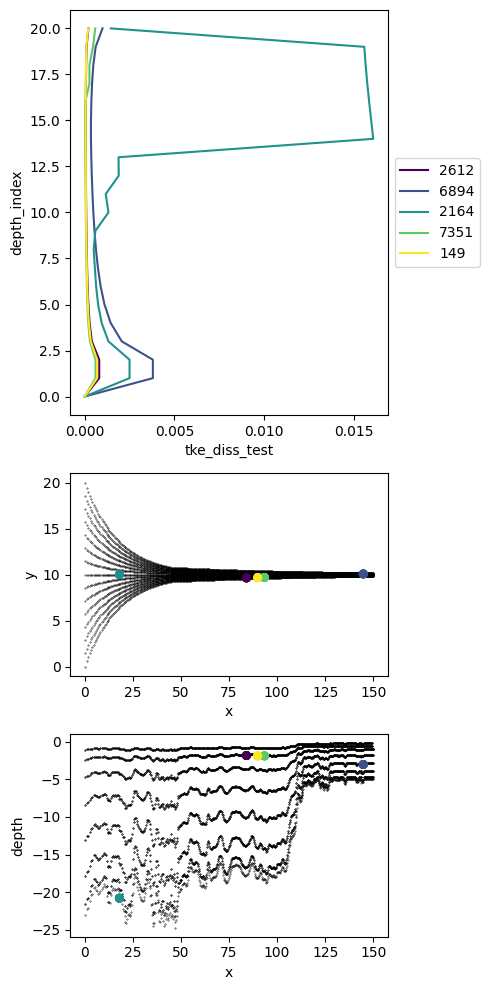

In [86]:
# vertical plot of tke_diss with depth index on y and values on x
depth_index = np.arange(21)
x = np.array(df.variables['SCHISM_hgrid_node_x'])*1e-3
y = np.array(df.variables['SCHISM_hgrid_node_y'])*1e-3
depth = np.array(df.variables['depth'])
tke_diss = df.variables['mixing_length']


# plot
fig, axs = plt.subplots(3, 1, figsize=(5, 10), gridspec_kw={'height_ratios': [2, 1, 1]})

n = 5
random_index = np.random.randint(0, 7500, n)

# 
colors = plt.cm.viridis(np.linspace(0, 1, n))

for jj,ii in enumerate(random_index):
    axs[0].plot(tke_diss[1, ii, :], depth_index, label=ii, color=colors[jj])
    axs[1].scatter(x[random_index], y[random_index], s=30, c=colors,zorder=10)
    axs[2].scatter(x[random_index], -depth[random_index], s=30, c=colors,zorder=10)

# Subplot 1: Plot of tke_diss_test vs depth_index
axs[0].set_xlabel('tke_diss_test')
axs[0].set_ylabel('depth_index')
# add legend right of plot
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Subplot 2: Scatter plot of x and y
axs[1].scatter(x, y, s=0.1, c='black')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

# Subplot 3: Scatter plot of x and depth
axs[2].scatter(x, -depth, s=0.1, c='black')
axs[2].set_xlabel('x')
axs[2].set_ylabel('depth')

plt.tight_layout()
plt.show()



## Looking at TKE diss distribution along depth

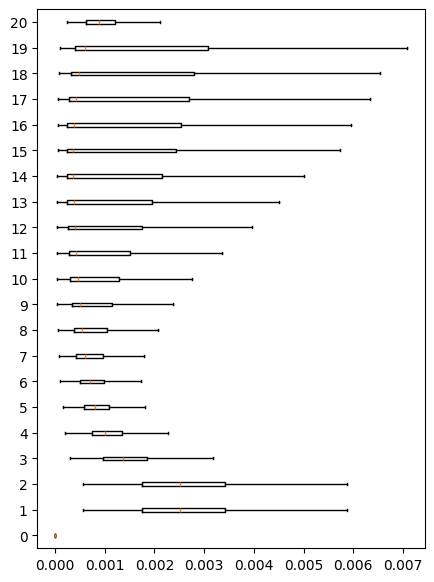

In [71]:
# # vertical plot of tke_diss with depth index on y and values on x
depth_index = np.arange(21)
x = np.array(df.variables['SCHISM_hgrid_node_x'])
y = np.array(df.variables['SCHISM_hgrid_node_y'])
depth = np.array(df.variables['depth'])
tke_diss = np.array(df.variables['mixing_length'])

daily_mean = np.mean(tke_diss, axis=0)

# make a boxplot for each depth layer based on the daily mean
plt.figure(figsize=(5, 7))
for ii in depth_index:
    plt.boxplot(daily_mean[:, ii], positions=[ii], vert=False, showfliers=False)